<a href="https://colab.research.google.com/github/Wan-Shi-Tong-bi/5Ws/blob/main/colab/4.03_DeBruijn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Build a DeBruijn Graph

Write a function "de_bruijn_ize" which gets a string and a kmer length k and returns the nodes and edges of the corresponding DeBruijn graph.

Remember how to build the DeBruijn Graph: 

  1. For each kmer, build the left and right (k-1)mer. These are the two starting nodes of the graph.
  2. Insert an edge between these two nodes.
  3. Repeat for all remaining kmers.

In [9]:
def de_bruijn_ize(st, k):
    """ Return a list holding, for each k-mer, its left
        k-1-mer and its right k-1-mer in a pair """
    edges = []
    nodes = set()
    for i in range(len(st) - k + 1):
        edges.append((st[i:i+k-1], st[i+1:i+k]))
        nodes.add(st[i:i+k-1])
        nodes.add(st[i+1:i+k])
    return nodes, edges

In [10]:
nodes, edges = de_bruijn_ize("ACGCGTCG", 3)

In [11]:
nodes

{'AC', 'CG', 'GC', 'GT', 'TC'}

In [12]:
edges

[('AC', 'CG'),
 ('CG', 'GC'),
 ('GC', 'CG'),
 ('CG', 'GT'),
 ('GT', 'TC'),
 ('TC', 'CG')]

In [13]:
def visualize_de_bruijn(st, k):
    """ Visualize a directed multigraph using graphviz """
    nodes, edges = de_bruijn_ize(st, k)
    dot_str = 'digraph "DeBruijn graph" {\n'
    for node in nodes:
        dot_str += '  %s [label="%s"] ;\n' % (node, node)
    for src, dst in edges:
        dot_str += '  %s -> %s ;\n' % (src, dst)
    return dot_str + '}\n'

In [14]:
# might have to install gvmagic this first:
!pip install gvmagic

In [15]:
%load_ext gvmagic

The gvmagic extension is already loaded. To reload it, use:
  %reload_ext gvmagic


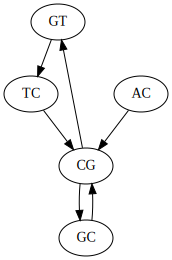

In [16]:
%dotstr visualize_de_bruijn("ACGCGTCG", 3)